# Import libraries :open_file_folder:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

# Read CSV file :scroll:

In [2]:
df = pd.read_csv("../../src/data_0.csv")
df

,id,address,price,floor,total_floors,rooms,square,city,remont,balcon,uid,view,year,type_perec,hot_water,fundament,kitchen
0,0,"улица Туполева, 15",3100000,9,9,1,36.4,Воронеж,standard,1,2059802857,garden,1986.0,Железобетонный,0.0,0.0,"8,5 м2"
1,1,"улица Фёдора Тютчева, 99",3270000,4,9,1,30.0,Воронеж,standard,1,2059678399,garden,2011.0,Железобетонный,0.0,0.0,0
2,2,"улица Фёдора Тютчева, 95Е",3350000,1,9,1,32.4,Воронеж,standard,1,2057432696,garden,2013.0,Железобетонный,0.0,0.0,9 м2
3,3,"переулок Парашютистов, 6",2800000,5,5,1,30.4,Воронеж,standard,1,2059084407,garden,1970.0,Железобетонный,0.0,0.0,6 м2
4,4,"улица Чебышева, 16",2100000,2,5,1,30.2,Воронеж,standard,1,2059631819,garden,1976.0,0,0.0,0.0,6 м2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18223,1817,"улица Кустодиева, 7к1",9000000,14,27,1,46.4,Санкт-Петербург,without_repair,1,2059729778,garden,2023.0,Железобетонный,Центральное,0,"10,8 м2"
18224,1818,"Вазаский переулок, 3",15000000,13,14,1,40.2,Санкт-Петербург,without_repair,1,1876442541,garden,2022.0,Железобетонный,Центральное,0,"12,2 м2"
18225,1819,"Образцовая улица, 2",7300000,4,4,1,36.3,посёлок Шушары,without_repair,1,2058604267,garden,2024.0,Железобетонный,0,0,"16,6 м2"
18226,1820,"Красносельское шоссе, 22",7899999,3,3,1,45.0,Санкт-Петербург,without_repair,1,2056548713,garden,2021.0,Железобетонный,Центральное,0,18 м2


# Exploratory Data Analysis (EDA) :gem: :mag:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18228 entries, 0 to 18227
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            18228 non-null  int64  
 1   address       18228 non-null  object 
 2   price         18228 non-null  int64  
 3   floor         18228 non-null  int64  
 4   total_floors  18228 non-null  int64  
 5   rooms         18228 non-null  int64  
 6   square        18228 non-null  float64
 7   city          18228 non-null  object 
 8   remont        18228 non-null  object 
 9   balcon        18228 non-null  int64  
 10  uid           18228 non-null  int64  
 11  view          18228 non-null  object 
 12  year          12619 non-null  float64
 13  type_perec    12619 non-null  object 
 14  hot_water     12619 non-null  object 
 15  fundament     12619 non-null  object 
 16  kitchen       12619 non-null  object 
dtypes: float64(2), int64(7), object(8)
memory usage: 2.4+ MB


In [4]:
df.describe()

,id,price,floor,total_floors,rooms,square,balcon,uid,year
count,18228.000000,1.822800e+04,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,1.822800e+04,12619.000000
mean,3827.620529,6.741739e+06,7.080151,12.445688,1.856539,54.050371,1.150208,2.024366e+09,1945.951898
std,2393.141404,4.269530e+06,5.034014,6.491784,0.943160,22.129948,0.357285,1.076005e+08,332.189664
min,0.000000,5.200000e+05,1.000000,1.000000,0.000000,11.400000,1.000000,1.192206e+08,0.000000
25%,1594.000000,4.300000e+06,3.000000,8.000000,1.000000,38.400000,1.000000,2.057157e+09,1983.000000
50%,3645.500000,5.750000e+06,6.000000,10.000000,2.000000,49.300000,1.000000,2.058759e+09,2011.000000
75%,5924.000000,7.800000e+06,10.000000,17.000000,3.000000,63.962500,1.000000,2.059513e+09,2019.000000
max,8205.000000,1.000000e+08,27.000000,47.000000,4.000000,586.000000,2.000000,2.059917e+09,2105.000000


In [5]:
df = df.loc[:, (df != 0).any(axis=0)]

In [6]:
df

,id,address,price,floor,total_floors,rooms,square,city,remont,balcon,uid,view,year,type_perec,hot_water,fundament,kitchen
0,0,"улица Туполева, 15",3100000,9,9,1,36.4,Воронеж,standard,1,2059802857,garden,1986.0,Железобетонный,0.0,0.0,"8,5 м2"
1,1,"улица Фёдора Тютчева, 99",3270000,4,9,1,30.0,Воронеж,standard,1,2059678399,garden,2011.0,Железобетонный,0.0,0.0,0
2,2,"улица Фёдора Тютчева, 95Е",3350000,1,9,1,32.4,Воронеж,standard,1,2057432696,garden,2013.0,Железобетонный,0.0,0.0,9 м2
3,3,"переулок Парашютистов, 6",2800000,5,5,1,30.4,Воронеж,standard,1,2059084407,garden,1970.0,Железобетонный,0.0,0.0,6 м2
4,4,"улица Чебышева, 16",2100000,2,5,1,30.2,Воронеж,standard,1,2059631819,garden,1976.0,0,0.0,0.0,6 м2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18223,1817,"улица Кустодиева, 7к1",9000000,14,27,1,46.4,Санкт-Петербург,without_repair,1,2059729778,garden,2023.0,Железобетонный,Центральное,0,"10,8 м2"
18224,1818,"Вазаский переулок, 3",15000000,13,14,1,40.2,Санкт-Петербург,without_repair,1,1876442541,garden,2022.0,Железобетонный,Центральное,0,"12,2 м2"
18225,1819,"Образцовая улица, 2",7300000,4,4,1,36.3,посёлок Шушары,without_repair,1,2058604267,garden,2024.0,Железобетонный,0,0,"16,6 м2"
18226,1820,"Красносельское шоссе, 22",7899999,3,3,1,45.0,Санкт-Петербург,without_repair,1,2056548713,garden,2021.0,Железобетонный,Центральное,0,18 м2


In [7]:
df.isna().sum()

id                 0
address            0
price              0
floor              0
total_floors       0
rooms              0
square             0
city               0
remont             0
balcon             0
uid                0
view               0
year            5609
type_perec      5609
hot_water       5609
fundament       5609
kitchen         5609
dtype: int64

In [8]:
df = df[df['year'].notna()]

In [9]:
df

,id,address,price,floor,total_floors,rooms,square,city,remont,balcon,uid,view,year,type_perec,hot_water,fundament,kitchen
0,0,"улица Туполева, 15",3100000,9,9,1,36.4,Воронеж,standard,1,2059802857,garden,1986.0,Железобетонный,0.0,0.0,"8,5 м2"
1,1,"улица Фёдора Тютчева, 99",3270000,4,9,1,30.0,Воронеж,standard,1,2059678399,garden,2011.0,Железобетонный,0.0,0.0,0
2,2,"улица Фёдора Тютчева, 95Е",3350000,1,9,1,32.4,Воронеж,standard,1,2057432696,garden,2013.0,Железобетонный,0.0,0.0,9 м2
3,3,"переулок Парашютистов, 6",2800000,5,5,1,30.4,Воронеж,standard,1,2059084407,garden,1970.0,Железобетонный,0.0,0.0,6 м2
4,4,"улица Чебышева, 16",2100000,2,5,1,30.2,Воронеж,standard,1,2059631819,garden,1976.0,0,0.0,0.0,6 м2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18223,1817,"улица Кустодиева, 7к1",9000000,14,27,1,46.4,Санкт-Петербург,without_repair,1,2059729778,garden,2023.0,Железобетонный,Центральное,0,"10,8 м2"
18224,1818,"Вазаский переулок, 3",15000000,13,14,1,40.2,Санкт-Петербург,without_repair,1,1876442541,garden,2022.0,Железобетонный,Центральное,0,"12,2 м2"
18225,1819,"Образцовая улица, 2",7300000,4,4,1,36.3,посёлок Шушары,without_repair,1,2058604267,garden,2024.0,Железобетонный,0,0,"16,6 м2"
18226,1820,"Красносельское шоссе, 22",7899999,3,3,1,45.0,Санкт-Петербург,without_repair,1,2056548713,garden,2021.0,Железобетонный,Центральное,0,18 м2


In [10]:
df.duplicated().sum()

911

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df

,id,address,price,floor,total_floors,rooms,square,city,remont,balcon,uid,view,year,type_perec,hot_water,fundament,kitchen
0,0,"улица Туполева, 15",3100000,9,9,1,36.4,Воронеж,standard,1,2059802857,garden,1986.0,Железобетонный,0.0,0.0,"8,5 м2"
1,1,"улица Фёдора Тютчева, 99",3270000,4,9,1,30.0,Воронеж,standard,1,2059678399,garden,2011.0,Железобетонный,0.0,0.0,0
2,2,"улица Фёдора Тютчева, 95Е",3350000,1,9,1,32.4,Воронеж,standard,1,2057432696,garden,2013.0,Железобетонный,0.0,0.0,9 м2
3,3,"переулок Парашютистов, 6",2800000,5,5,1,30.4,Воронеж,standard,1,2059084407,garden,1970.0,Железобетонный,0.0,0.0,6 м2
4,4,"улица Чебышева, 16",2100000,2,5,1,30.2,Воронеж,standard,1,2059631819,garden,1976.0,0,0.0,0.0,6 м2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17312,1817,"улица Кустодиева, 7к1",9000000,14,27,1,46.4,Санкт-Петербург,without_repair,1,2059729778,garden,2023.0,Железобетонный,Центральное,0,"10,8 м2"
17313,1818,"Вазаский переулок, 3",15000000,13,14,1,40.2,Санкт-Петербург,without_repair,1,1876442541,garden,2022.0,Железобетонный,Центральное,0,"12,2 м2"
17314,1819,"Образцовая улица, 2",7300000,4,4,1,36.3,посёлок Шушары,without_repair,1,2058604267,garden,2024.0,Железобетонный,0,0,"16,6 м2"
17315,1820,"Красносельское шоссе, 22",7899999,3,3,1,45.0,Санкт-Петербург,without_repair,1,2056548713,garden,2021.0,Железобетонный,Центральное,0,18 м2


# Visualization (graphics)

delete temporary columns

In [14]:
df = df.drop(["id", "address", "uid", "kitchen"], axis=1)

In [15]:
count_rooms = df['rooms'].value_counts()
count_rooms

rooms
1    4854
2    3277
3    2895
0     368
4     314
Name: count, dtype: int64

In [16]:
df

,price,floor,total_floors,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament
0,3100000,9,9,1,36.4,Воронеж,standard,1,garden,1986.0,Железобетонный,0.0,0.0
1,3270000,4,9,1,30.0,Воронеж,standard,1,garden,2011.0,Железобетонный,0.0,0.0
2,3350000,1,9,1,32.4,Воронеж,standard,1,garden,2013.0,Железобетонный,0.0,0.0
3,2800000,5,5,1,30.4,Воронеж,standard,1,garden,1970.0,Железобетонный,0.0,0.0
4,2100000,2,5,1,30.2,Воронеж,standard,1,garden,1976.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17312,9000000,14,27,1,46.4,Санкт-Петербург,without_repair,1,garden,2023.0,Железобетонный,Центральное,0
17313,15000000,13,14,1,40.2,Санкт-Петербург,without_repair,1,garden,2022.0,Железобетонный,Центральное,0
17314,7300000,4,4,1,36.3,посёлок Шушары,without_repair,1,garden,2024.0,Железобетонный,0,0
17315,7899999,3,3,1,45.0,Санкт-Петербург,without_repair,1,garden,2021.0,Железобетонный,Центральное,0


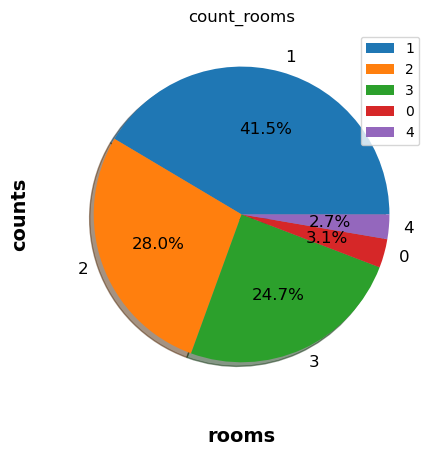

In [17]:
plt.figure()
explode = (0,0.09)
count_rooms.plot(kind = 'pie', fontsize = 12, autopct = '%.1f%%',shadow = True)
plt.title('count_rooms')
plt.xlabel('rooms', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = count_rooms.index, loc = "best")
plt.show()

In [18]:
count_remont = df['remont'].value_counts()
count_remont

remont
standard          4549
well_done         3811
without_repair    1812
design            1525
simple              11
Name: count, dtype: int64

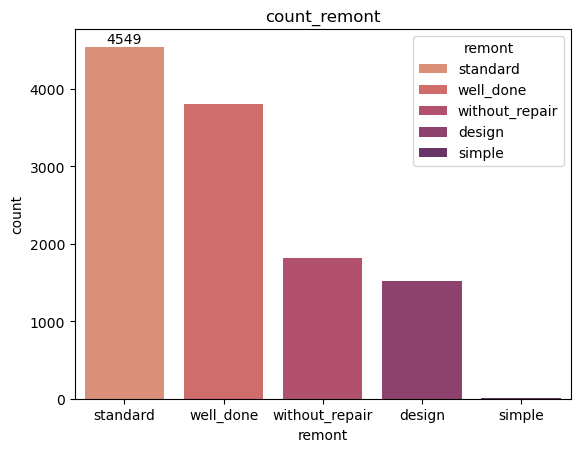

In [19]:
plt.figure()
ax=sns.barplot(x=count_remont.index,y=count_remont.values, palette='flare', legend=True, hue=count_remont.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_remont')
plt.xlabel('remont')
plt.ylabel('count')
plt.show()

In [20]:
# count_type_home = df['type_home'].value_counts()
# count_type_home

In [21]:
# plt.figure()
# ax=sns.barplot(x=count_type_home.index,y=count_type_home.values, palette='flare', legend=True, hue=count_type_home.index)
# ax.bar_label(ax.containers[0], fontsize=10);
# plt.title('count_type_home')
# plt.xlabel('type_home')
# plt.ylabel('count')
# plt.show()

In [22]:
count_balcon = df['balcon'].value_counts()
count_balcon

balcon
1    10173
2     1535
Name: count, dtype: int64

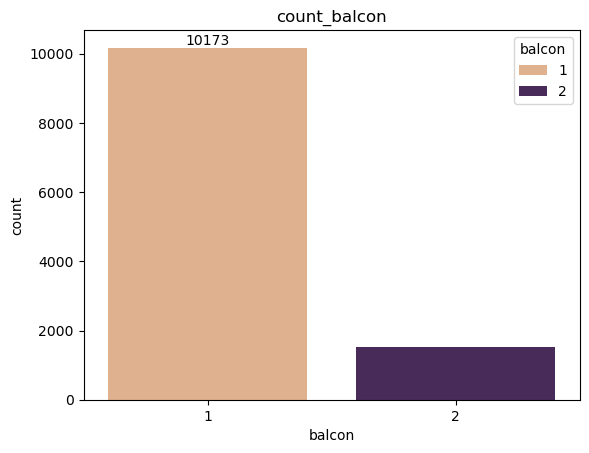

In [23]:
plt.figure()
ax=sns.barplot(x=count_balcon.index,y=count_balcon.values, palette='flare', legend=True, hue=count_balcon.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_balcon')
plt.xlabel('balcon')
plt.ylabel('count')
plt.show()

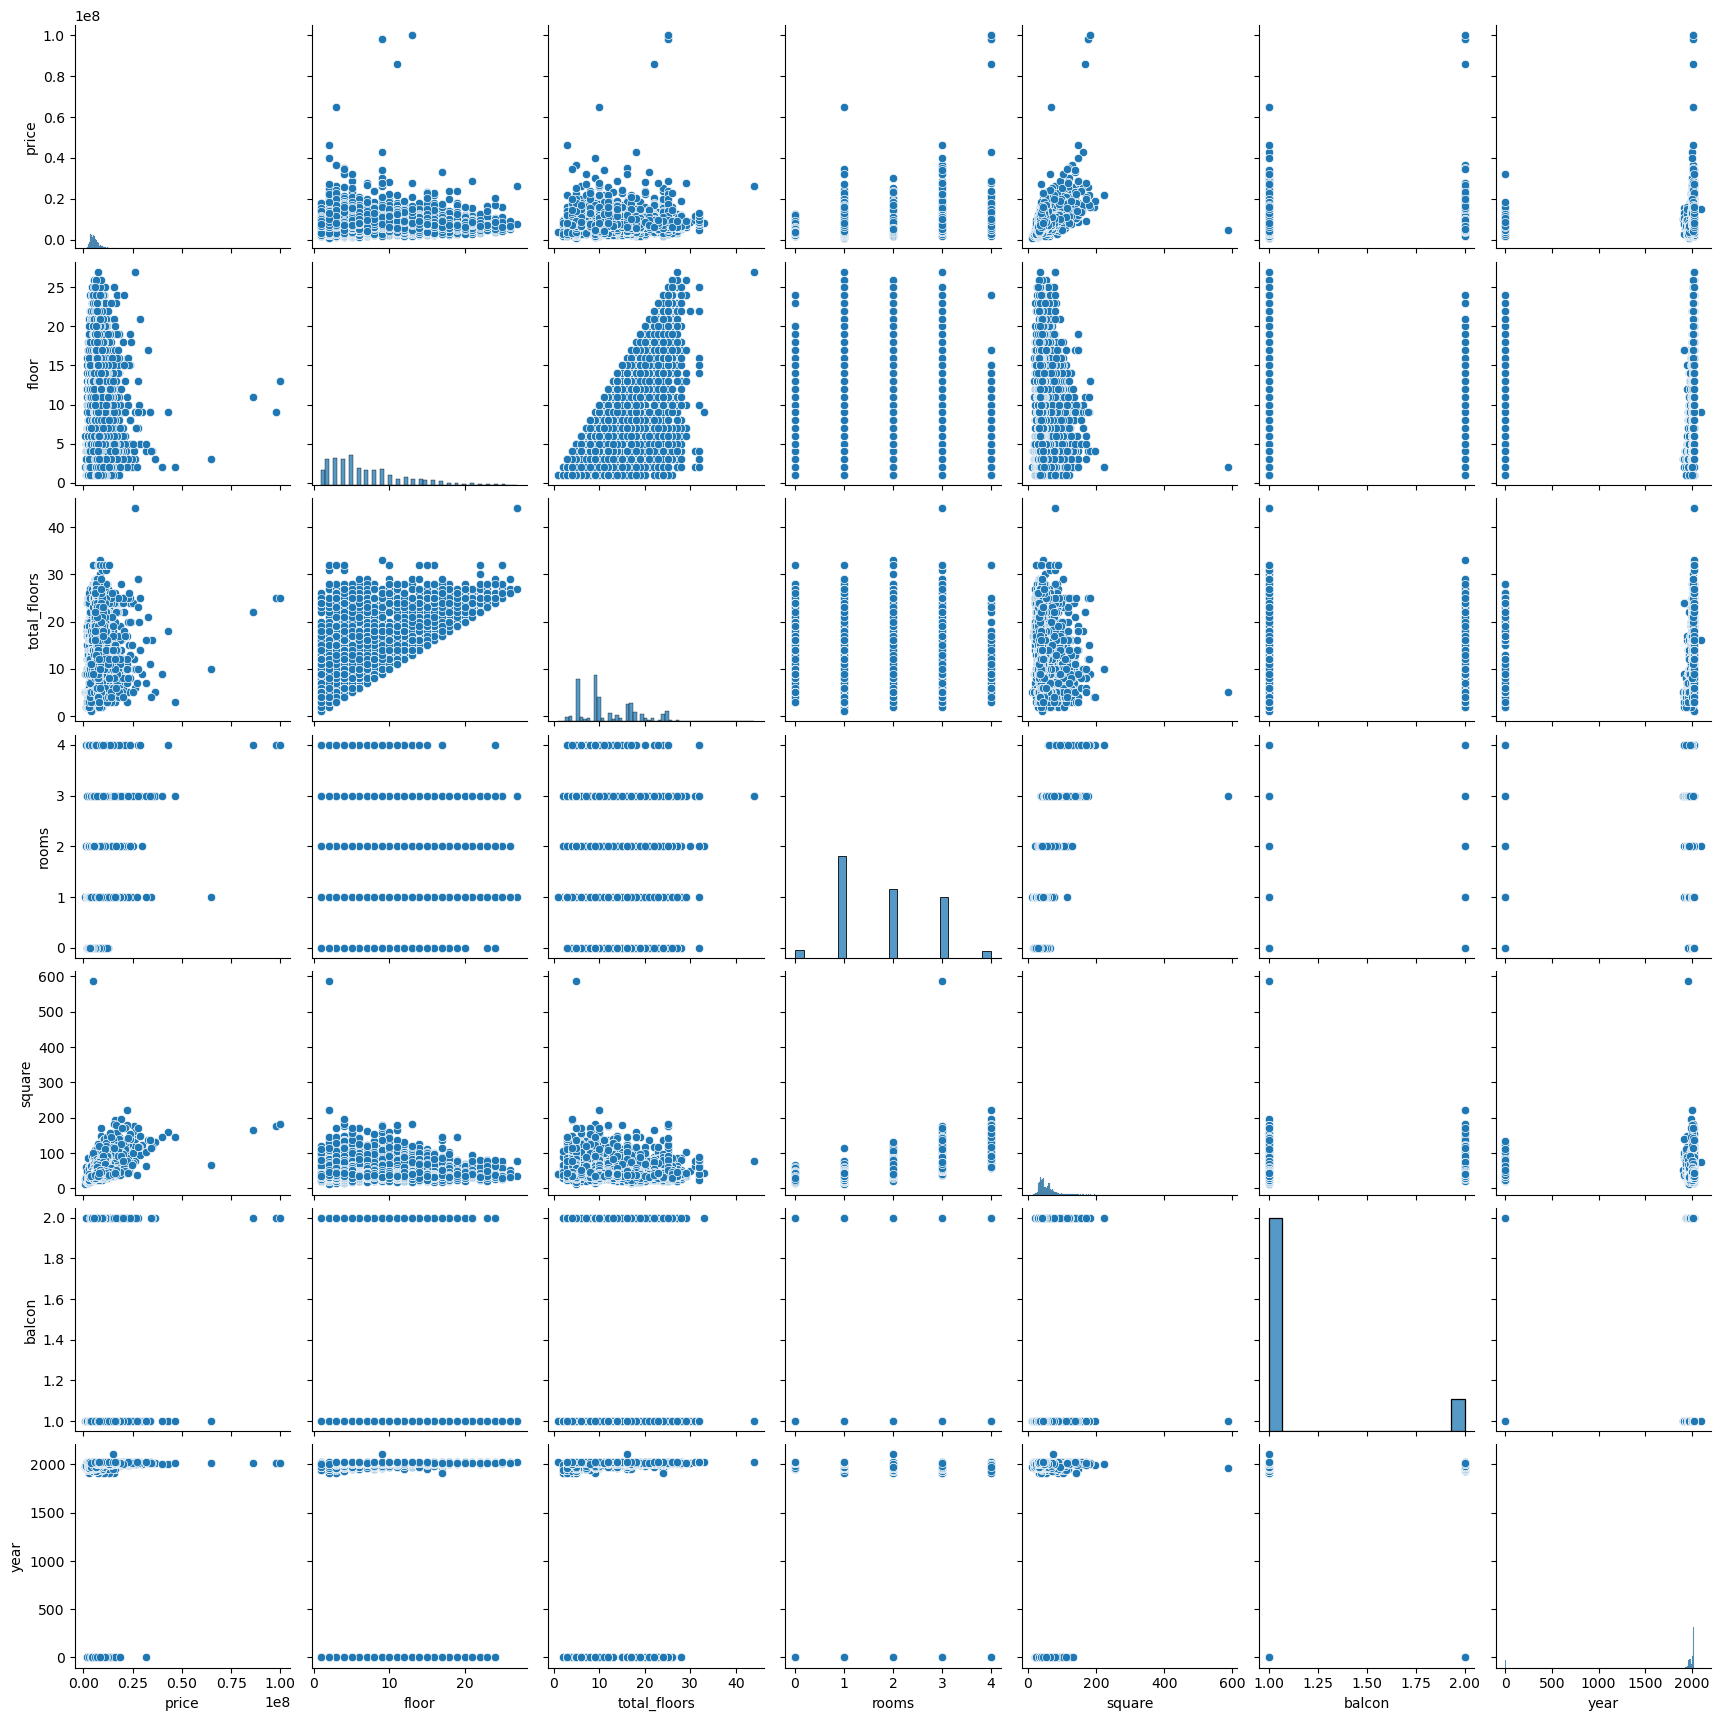

In [24]:
sns.pairplot(df)

<Axes: xlabel='rooms', ylabel='price'>

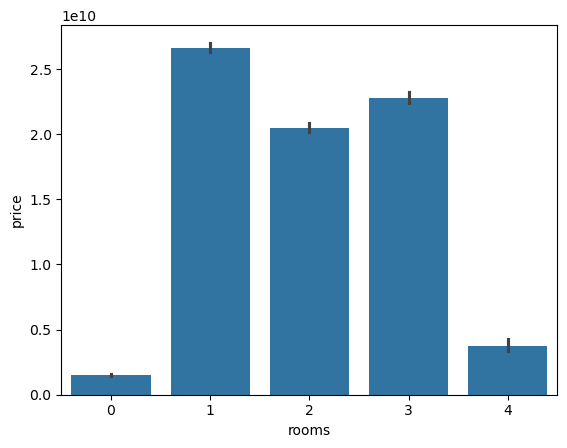

In [25]:
sns.barplot(data=df, x="rooms", y="price", estimator=np.sum)

<Axes: xlabel='floor', ylabel='price'>

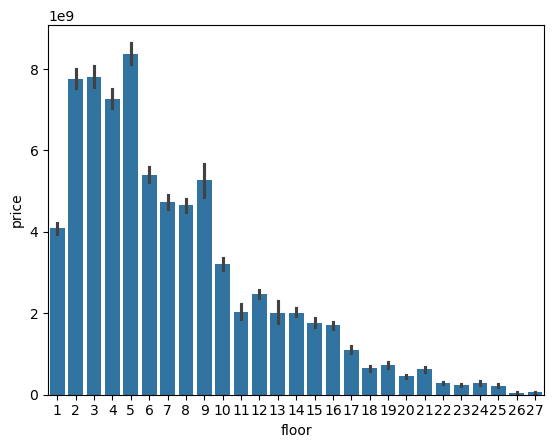

In [26]:
sns.barplot(data=df, x="floor", y="price", estimator=np.sum)

<Axes: xlabel='balcon', ylabel='price'>

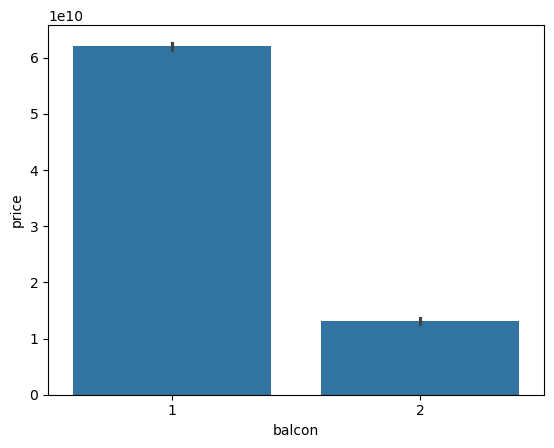

In [27]:
sns.barplot(data=df, x="balcon", y="price", estimator=np.sum)

<Axes: xlabel='price', ylabel='year'>

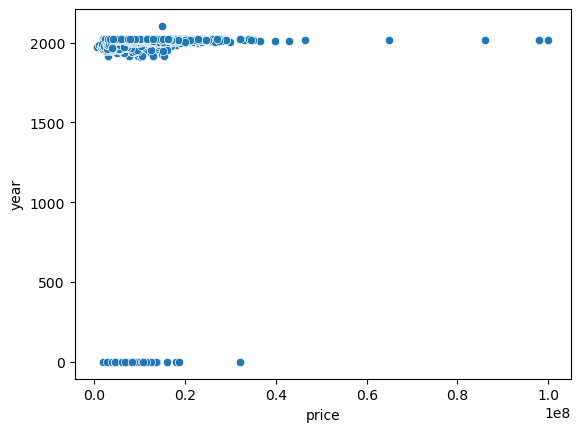

In [28]:
sns.scatterplot(data=df, x="price", y="year")

# Encoding Data :bomb:

In [29]:
le = LabelEncoder()
columns = ["city", "remont", "view", "type_perec", "hot_water", "fundament", "year"]
for column in columns:
    df[column]=le.fit_transform(df[column])


In [30]:
df

,price,floor,total_floors,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament
0,3100000,9,9,1,36.4,2,2,1,1,54,4,1,1
1,3270000,4,9,1,30.0,2,2,1,1,79,4,1,1
2,3350000,1,9,1,32.4,2,2,1,1,81,4,1,1
3,2800000,5,5,1,30.4,2,2,1,1,38,4,1,1
4,2100000,2,5,1,30.2,2,2,1,1,44,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17312,9000000,14,27,1,46.4,17,4,1,1,91,4,10,0
17313,15000000,13,14,1,40.2,17,4,1,1,90,4,10,0
17314,7300000,4,4,1,36.3,27,4,1,1,92,4,0,0
17315,7899999,3,3,1,45.0,17,4,1,1,89,4,10,0


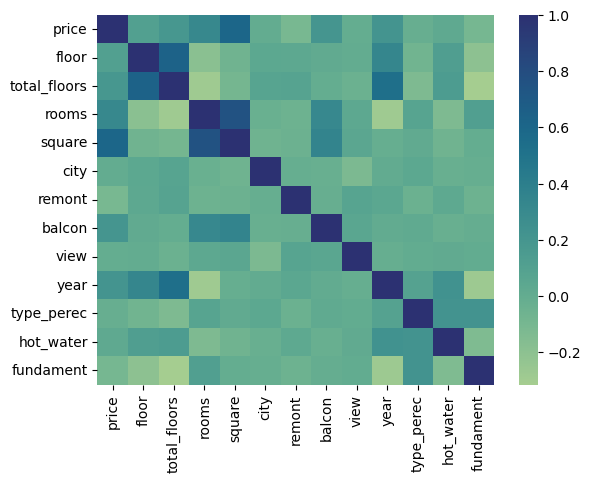

In [31]:
# df = df.drop(["city"], axis=1)
plt.figure()
# sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar=True)
sns.heatmap(df.corr(), cmap='crest')
plt.show()


In [32]:
count_city = df['city'].value_counts()
count_city

city
10    2255
6     1801
21    1634
2     1292
1      950
11     783
17     644
13     490
4      457
0      369
12     355
20     265
19     174
24      97
27      50
16      41
15      14
5       11
3        6
14       4
18       4
25       3
9        3
8        2
26       1
23       1
7        1
22       1
Name: count, dtype: int64

In [33]:
df

,price,floor,total_floors,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament
0,3100000,9,9,1,36.4,2,2,1,1,54,4,1,1
1,3270000,4,9,1,30.0,2,2,1,1,79,4,1,1
2,3350000,1,9,1,32.4,2,2,1,1,81,4,1,1
3,2800000,5,5,1,30.4,2,2,1,1,38,4,1,1
4,2100000,2,5,1,30.2,2,2,1,1,44,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17312,9000000,14,27,1,46.4,17,4,1,1,91,4,10,0
17313,15000000,13,14,1,40.2,17,4,1,1,90,4,10,0
17314,7300000,4,4,1,36.3,27,4,1,1,92,4,0,0
17315,7899999,3,3,1,45.0,17,4,1,1,89,4,10,0


# :star: Features & Target :dart: 

In [34]:
x = df.drop(columns=['price'])
y = df['price']

In [35]:
y

0         3100000
1         3270000
2         3350000
3         2800000
4         2100000
           ...   
17312     9000000
17313    15000000
17314     7300000
17315     7899999
17316    16100000
Name: price, Length: 11708, dtype: int64

In [36]:
y=y.values.reshape(-1,1)
y

array([[ 3100000],
       [ 3270000],
       [ 3350000],
       ...,
       [ 7300000],
       [ 7899999],
       [16100000]])

# :mag: Scaling and split :scissors:

In [37]:
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)
# y = scaler.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

# Teach Models :books:

In [38]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'CatBoost': CatBoostRegressor()
}

Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR', 'CatBoost']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 4781083235069.302
Mean Absolute Error (MAE): 1510891.8037452726
Root Mean Squared Error (RMSE): 2186568.8269682485
R-squared Score: 0.5482786362660805

Results for Decision Tree:
Mean Squared Error (MSE): 3710692959012.0107
Mean Absolute Error (MAE): 982447.9773697695
Root Mean Squared Error (RMSE): 1926315.9032235628
R-squared Score: 0.6494101438042708



/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Results for Random Forest:
Mean Squared Error (MSE): 1868259506523.291
Mean Absolute Error (MAE): 820136.3236222602
Root Mean Squared Error (RMSE): 1366842.897528202
R-squared Score: 0.8234850366324301



/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results for SVR:
Mean Squared Error (MSE): 11289544513601.885
Mean Absolute Error (MAE): 2165682.413938143
Root Mean Squared Error (RMSE): 3359991.743085373
R-squared Score: -0.0666470740798788

Results for XGBoost:
Mean Squared Error (MSE): 1891718694471.4438
Mean Absolute Error (MAE): 876005.723793766
Root Mean Squared Error (RMSE): 1375397.6495804563
R-squared Score: 0.8212685898878302

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 471
[LightGBM] [Info] Number of data points in the train set: 9366, number of used features: 12
[LightGBM] [Info] Start training from score 6445799.611894


/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/lightgbm/basic.py:335: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Results for LightGBM:
Mean Squared Error (MSE): 2248734965179.001
Mean Absolute Error (MAE): 952990.7831685084
Root Mean Squared Error (RMSE): 1499578.2624388102
R-squared Score: 0.7875373476671794

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 2564721025096.4473
Mean Absolute Error (MAE): 1027600.6244827561
Root Mean Squared Error (RMSE): 1601474.6407909328
R-squared Score: 0.7576826794071009



/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results for ADA Boost:
Mean Squared Error (MSE): 15599176630727.826
Mean Absolute Error (MAE): 3598071.5995299593
Root Mean Squared Error (RMSE): 3949579.2979414687
R-squared Score: -0.4738252806545258

Results for K Neighbors Regressor:
Mean Squared Error (MSE): 4132875422954.73
Mean Absolute Error (MAE): 1268183.8771989753
Root Mean Squared Error (RMSE): 2032947.47176476
R-squared Score: 0.6095219366804332

Results for Linear SVR:
Mean Squared Error (MSE): 6548217590146.3125
Mean Absolute Error (MAE): 1581645.9940801929
Root Mean Squared Error (RMSE): 2558948.532140948
R-squared Score: 0.38131807491854797

Learning rate set to 0.058302
0:	learn: 4036000.6353424	total: 61ms	remaining: 1m
1:	learn: 3923225.0696706	total: 62.3ms	remaining: 31.1s
2:	learn: 3810996.4813056	total: 63.6ms	remaining: 21.1s
3:	learn: 3699991.5981373	total: 65.7ms	remaining: 16.4s
4:	learn: 3595698.3901732	total: 68.5ms	remaining: 13.6s
5:	learn: 3503035.6848142	total: 71.1ms	remaining: 11.8s
6:	learn: 3414813

/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevin/anaconda3/envs/asosn_ml/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


30:	learn: 2307152.3017473	total: 125ms	remaining: 3.92s
31:	learn: 2286376.0804407	total: 128ms	remaining: 3.88s
32:	learn: 2253575.8572459	total: 131ms	remaining: 3.84s
33:	learn: 2231569.0257818	total: 134ms	remaining: 3.8s
34:	learn: 2211189.6164133	total: 137ms	remaining: 3.77s
35:	learn: 2194504.1938462	total: 140ms	remaining: 3.74s
36:	learn: 2167384.5898915	total: 142ms	remaining: 3.7s
37:	learn: 2151351.8270408	total: 145ms	remaining: 3.67s
38:	learn: 2136121.4101305	total: 148ms	remaining: 3.64s
39:	learn: 2116090.8760181	total: 149ms	remaining: 3.58s
40:	learn: 2104584.7049837	total: 152ms	remaining: 3.55s
41:	learn: 2090944.8088829	total: 155ms	remaining: 3.53s
42:	learn: 2074684.2306959	total: 157ms	remaining: 3.5s
43:	learn: 2062468.9133671	total: 161ms	remaining: 3.5s
44:	learn: 2044553.9583114	total: 164ms	remaining: 3.48s
45:	learn: 2034602.2017242	total: 166ms	remaining: 3.45s
46:	learn: 2015454.2937387	total: 170ms	remaining: 3.44s
47:	learn: 2007686.5756233	total: 1

# Save model :floppy_disk:

In [42]:
model.save_model("../../models/gamma0.bin")